In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats


In [9]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#lets see the null values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

#### As we can see HDI for year has too many null values so we drop it

In [5]:
df.drop(['HDI for year','country-year'], axis=1, inplace=True)

#### Top 10 countries with highest suicide rate

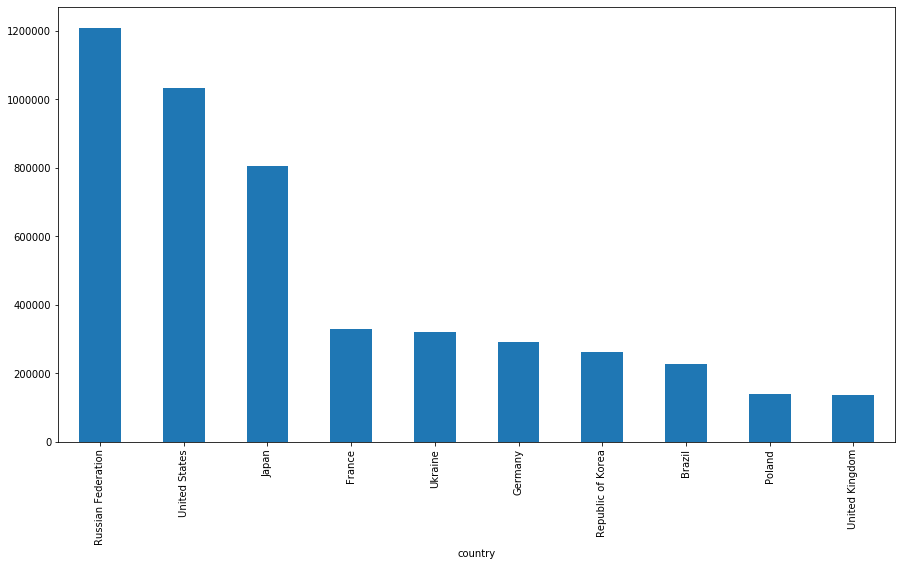

In [6]:
df = df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)
df.plot.bar(figsize=(15,8))

#### Now we see how suicide rate is affected by the gender

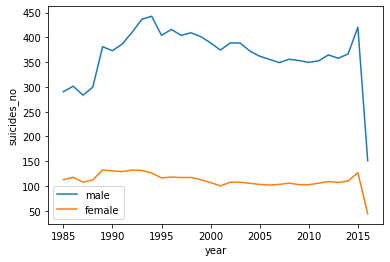

In [10]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

#### As we can see above the number of ale suicides have been consistently more than females and peaked around 1995

### Now we see the ratio of suicides between the two genders

Text(0.5, 1.0, 'Number of suicides between different Genders')

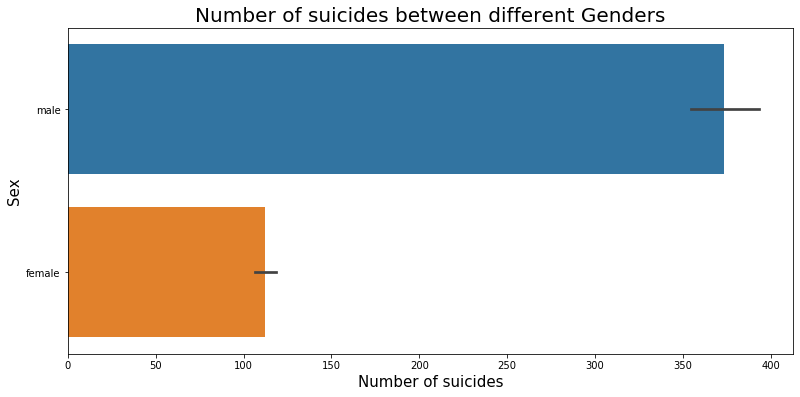

In [12]:
plt.figure(figsize=(13,6))
sns.barplot(x=df['suicides_no'], y='sex', data= df)
plt.xlabel('Number of suicides', fontsize= 15)
plt.ylabel('Sex', fontsize= 15)
plt.title("Number of suicides between different Genders", fontsize = 20)

As you can see the ratio of suicides Male:Female is nearly 3:1

Text(0.5, 1, 'Heatmap')

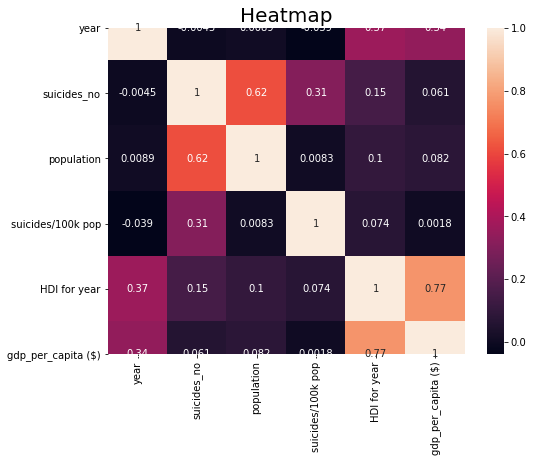

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap", fontsize=20)

From the above heatmap we can draw inferences such that

1.Population plays a role in the rate of suicide as correlation in 0.62

2.gdp, hdi have negligible impact

3.Year has a negligible but negative impact 